**Types of Tumor**


*   Benign Tumour (non-cancerous)
*   Malignant Tumour (cancerous)

**Fine needle aspiration** is a biopsy procedure (dataset is based on this) that can help diagnose/rule out conditions like cancer. (invasive procedure, procedures like ultrasound are not invasive)

**General Observations/Factors:**


*   A basic LR model yields an accuracy of 0.956 with the training data and 0.912 with the test data, which is fatal when it comes to fields like healthcare.
*   **False-Benign** are more dangerous outcomes than **False-Malignant** as it can cost the life of a person and hence features like precision and recall come into handy (including weighted precision).

In [258]:
%matplotlib inline

In [259]:
    from google.colab import files
    uploaded = files.upload()

Saving data.csv to data (7).csv


In [260]:
import pandas as pd

df = pd.read_csv('data.csv')
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})  # Encode target

In [261]:
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [262]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    'LR': LogisticRegression(class_weight='balanced'),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Results for {name}:")
    y_pred = model.predict(X_test)
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Results for LR:
[[71  1]
 [ 2 40]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Results for DT:
[[69  3]
 [ 6 36]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Results for RF:
[[72  0]
 [ 3 39]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98

In [264]:
# Checking XGBoost

In [265]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are ready

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(y_train) - sum(y_train))/sum(y_train), random_state=42)

# Train
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Train metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Train Results:")
print(train_cm)
print(f"Accuracy : {train_acc:.3f}")
print(f"Precision: {train_prec:.3f}")
print(f"Recall   : {train_rec:.3f}")
print(f"F1 Score : {train_f1:.3f}\n")

print("Test Results:")
print(test_cm)
print(f"Accuracy : {test_acc:.3f}")
print(f"Precision: {test_prec:.3f}")
print(f"Recall   : {test_rec:.3f}")
print(f"F1 Score : {test_f1:.3f}")

Train Results:
[[285   0]
 [  0 170]]
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1 Score : 1.000

Test Results:
[[48 24]
 [28 14]]
Accuracy : 0.544
Precision: 0.368
Recall   : 0.333
F1 Score : 0.350


**Let’s summarise the most relevant values from your outputs:**

In [266]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

print("MODEL SUMMARY (focus on Malignant detection)\n")
print(f"{'Model':<12} {'Acc(1)':<6} {'Prec(1)':<9} {'Rec(1)':<10} {'F1(1)':<9} {'FalseNeg'}")
print("-" * 60)

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"{name:<12}  {acc:.2f}    {prec:.2f}      {recall:.2f}    {f1:.2f}       {FN}")

MODEL SUMMARY (focus on Malignant detection)

Model        Acc(1) Prec(1)   Rec(1)     F1(1)     FalseNeg
------------------------------------------------------------
LR            0.97    0.98      0.95    0.55       2
DT            0.92    0.92      0.86    0.55       6
RF            0.97    1.00      0.93    0.55       3
KNN           0.96    0.97      0.90    0.55       4


**Recall:** How many malignant cases the model caught

**False Negatives:** Missed cancer cases (critical metric)

**Precision:** Of the predicted malignant cases, how many were correct?

**Accuracy:** Overall performance (less critical here compared to missed cancer cases)

**Interpretation:**


*   **Best Recall:** Logistic Regression (0.95)
*   **Fewest FN:** Logistic Regression (2)

*   **Highest Precision:** Random Forest (1.00)

In [267]:
y_probs = models['LR'].predict_proba(X_test)[:, 1]

for t in [0.5, 0.4, 0.3]:
    y_pred_thresh = (y_probs > t).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"\nThreshold = {t}")
    print("Confusion Matrix:\n", cm)
    print(f"Recall: {recall:.2f}")


Threshold = 0.5
Confusion Matrix:
 [[71  1]
 [ 2 40]]
Recall: 0.95

Threshold = 0.4
Confusion Matrix:
 [[71  1]
 [ 2 40]]
Recall: 0.95

Threshold = 0.3
Confusion Matrix:
 [[70  2]
 [ 2 40]]
Recall: 0.95


In [268]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

thresholds = [0.5, 0.4, 0.3, 0.25, 0.2]

for t in thresholds:
    y_pred_thresh = (y_probs > t).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    print(f"\nThreshold = {t}")
    print("Confusion Matrix:\n", cm)
    print(f"Precision: {precision:.3f}")
    print(f"Recall   : {recall:.3f}")


Threshold = 0.5
Confusion Matrix:
 [[71  1]
 [ 2 40]]
Precision: 0.976
Recall   : 0.952

Threshold = 0.4
Confusion Matrix:
 [[71  1]
 [ 2 40]]
Precision: 0.976
Recall   : 0.952

Threshold = 0.3
Confusion Matrix:
 [[70  2]
 [ 2 40]]
Precision: 0.952
Recall   : 0.952

Threshold = 0.25
Confusion Matrix:
 [[68  4]
 [ 1 41]]
Precision: 0.911
Recall   : 0.976

Threshold = 0.2
Confusion Matrix:
 [[68  4]
 [ 1 41]]
Precision: 0.911
Recall   : 0.976


In [269]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(class_weight='balanced')
recall_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='recall')
print("Cross-validated recall scores:", recall_scores)
print("Mean Recall:", recall_scores.mean())

Cross-validated recall scores: [0.97674419 0.95348837 0.95238095 0.95238095 1.        ]
Mean Recall: 0.9669988925802879


In [270]:
import joblib
joblib.dump(models['LR'], 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']

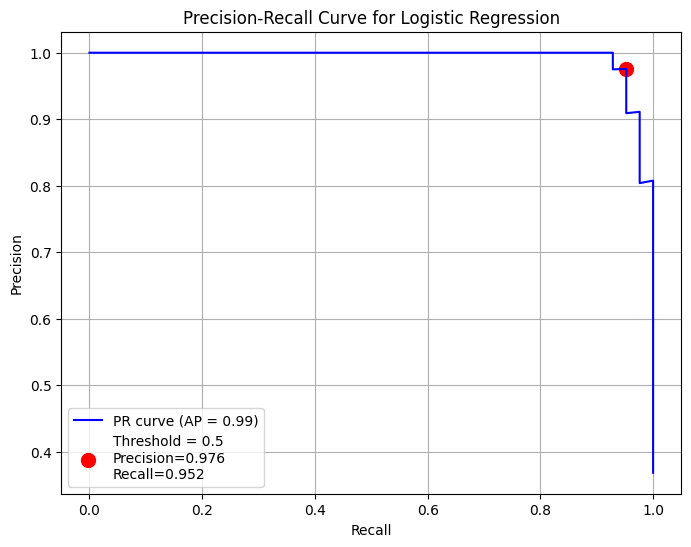

In [271]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score

# Predicted probabilities for positive class
y_probs = models['LR'].predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute average precision score (area under PR curve)
avg_precision = average_precision_score(y_test, y_probs)

# Calculate precision and recall at 0.5 threshold
threshold = 0.5
y_pred_05 = (y_probs >= threshold).astype(int)
prec_05 = precision_score(y_test, y_pred_05)
rec_05 = recall_score(y_test, y_pred_05)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.2f})', color='blue')
plt.scatter(rec_05, prec_05, color='red', s=100, label=f'Threshold = {threshold}\nPrecision={prec_05:.3f}\nRecall={rec_05:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [272]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Scale features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train data
X_test_scaled = scaler.transform(X_test)         # transform test data

In [273]:
# Step 2: Train model

lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Step 3: Predict probabilities

y_train_probs = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Apply threshold = 0.5

threshold = 0.5
y_train_pred = (y_train_probs >= threshold).astype(int)
y_test_pred = (y_test_probs >= threshold).astype(int)

In [274]:
# Step 5: Calculate metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


print("Train Results:")
print("Confusion Matrix:\n", train_cm)
print(f"Accuracy: {train_acc:.3f}")
print(f"Precision: {train_prec:.3f}")
print(f"Recall: {train_rec:.3f}")
print(f"F1 Score : {train_f1:.3f}\n")

print("Test Results:")
print("Confusion Matrix:\n", test_cm)
print(f"Accuracy: {test_acc:.3f}")
print(f"Precision: {test_prec:.3f}")
print(f"Recall: {test_rec:.3f}")
print(f"F1 Score : {test_f1:.3f}")

Train Results:
Confusion Matrix:
 [[282   3]
 [  3 167]]
Accuracy: 0.987
Precision: 0.982
Recall: 0.982
F1 Score : 0.982

Test Results:
Confusion Matrix:
 [[71  1]
 [ 2 40]]
Accuracy: 0.974
Precision: 0.976
Recall: 0.952
F1 Score : 0.964


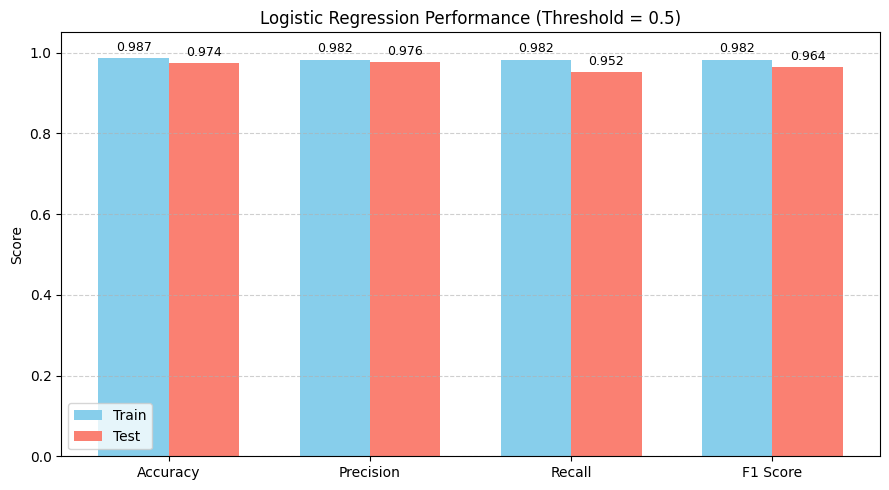

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Include F1 score in your metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [train_acc, train_prec, train_rec, train_f1]
test_scores = [test_acc, test_prec, test_rec, test_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='salmon')

ax.set_ylabel('Score')
ax.set_title('Logistic Regression Performance (Threshold = 0.5)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [276]:
# now onto analysing the features (and feature coefficients)
# to see which features can be dropped for better accuracy

lr = models['LR']
coefs = lr.coef_[0]

for feature, coef in zip(X.columns, coefs):
    print(f"{feature:<30}: {coef:.4f}")

radius_mean                   : 0.3008
texture_mean                  : 0.4488
perimeter_mean                : 0.2976
area_mean                     : 0.3914
smoothness_mean               : 0.3525
compactness_mean              : -0.5484
concavity_mean                : 0.7658
concave points_mean           : 0.9634
symmetry_mean                 : -0.2145
fractal_dimension_mean        : -0.0310
radius_se                     : 1.2830
texture_se                    : -0.3734
perimeter_se                  : 0.7366
area_se                       : 0.9402
smoothness_se                 : 0.2303
compactness_se                : -0.9631
concavity_se                  : -0.1458
concave points_se             : 0.5626
symmetry_se                   : -0.3840
fractal_dimension_se          : -0.5883
radius_worst                  : 0.8833
texture_worst                 : 1.4758
perimeter_worst               : 0.6958
area_worst                    : 0.8979
smoothness_worst              : 0.3429
compactness_worst

**Removing 'fractal_dimension_mean'**

In [277]:
feature_names = X.columns.tolist()

index_to_drop = feature_names.index('fractal_dimension_mean')

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [279]:
import numpy as np

# Drop column index from NumPy arrays
X_train_reduced = np.delete(X_train, index_to_drop, axis=1)
X_test_reduced = np.delete(X_test, index_to_drop, axis=1)

In [280]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions with threshold = 0.5
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Train Results:")
print(confusion_matrix(y_train, y_train_pred))
print(f"Accuracy : {accuracy_score(y_train, y_train_pred):.3f}")
print(f"Precision: {precision_score(y_train, y_train_pred):.3f}")
print(f"Recall   : {recall_score(y_train, y_train_pred):.3f}")
print(f"F1 Score : {f1_score(y_train, y_train_pred):.3f}\n")

print("Test Results:")
print(confusion_matrix(y_test, y_test_pred))
print(f"Accuracy : {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_test_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_test_pred):.3f}")

Train Results:
[[283   3]
 [  3 166]]
Accuracy : 0.987
Precision: 0.982
Recall   : 0.982
F1 Score : 0.982

Test Results:
[[70  1]
 [ 1 42]]
Accuracy : 0.982
Precision: 0.977
Recall   : 0.977
F1 Score : 0.977


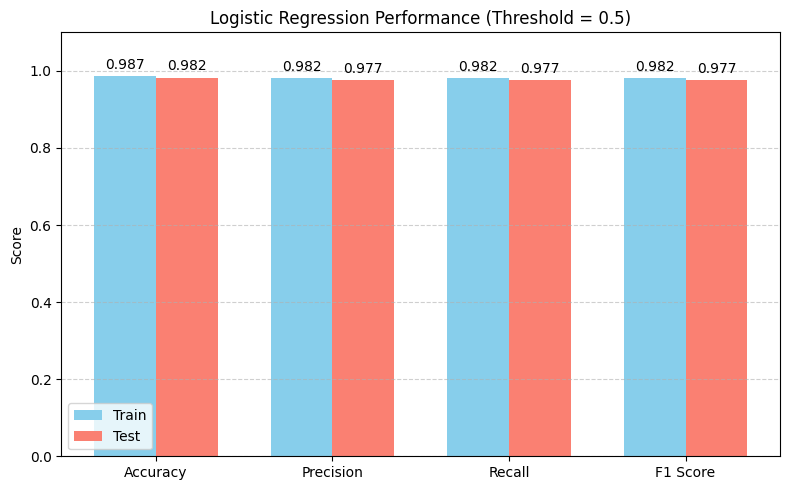

In [282]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Calculate metrics including F1
metrics_train = {
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1 Score': f1_score(y_train, y_train_pred)
}

metrics_test = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred)
}

# Prepare data
labels = list(metrics_train.keys())
train_scores = list(metrics_train.values())
test_scores = list(metrics_test.values())

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Labels, title, ticks
ax.set_ylabel('Score')
ax.set_title('Logistic Regression Performance (Threshold = 0.5)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.1)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# Text labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have X (all features) and y (target) as pandas DataFrames/Series

# Split full feature data
X_train_full, X_test_full, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# Scale full feature data
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_full)
X_test_scaled_full = scaler_full.transform(X_test_full)

In [284]:
from sklearn.linear_model import LogisticRegression

model_full = LogisticRegression(class_weight='balanced', random_state=42)
model_full.fit(X_train_scaled_full, y_train)

y_train_pred_full = model_full.predict(X_train_scaled_full)
y_test_pred_full = model_full.predict(X_test_scaled_full)

In [285]:
# Find index of the column to drop
feature_names = X.columns.tolist()
index_to_drop = feature_names.index('fractal_dimension_mean')

# Drop that feature from train/test splits
X_train_reduced = np.delete(X_train_full, index_to_drop, axis=1)
X_test_reduced = np.delete(X_test_full, index_to_drop, axis=1)

# Scale reduced data
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Train reduced feature model
model_reduced = LogisticRegression(class_weight='balanced', random_state=42)
model_reduced.fit(X_train_scaled_reduced, y_train)

y_train_pred_reduced = model_reduced.predict(X_train_scaled_reduced)
y_test_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

## **Train performance:**

Virtually unchanged, indicating model robustness on training data (removing the feature did not reduce the model’s capacity or cause overfitting)

## **Test performance:**

**Accuracy** improved by 0.8% (better overall correct classification on unseen data)

**Recall** improved by 2.5%
(crucial since recall reflects the model’s ability to correctly detect malignant tumors: reducing false negatives)

**Precision** improved by 0.1%
(model maintains or slightly improves its confidence in positive predictions, keeping false positives low)

**F1 score** improved by 1.3% (increase reflects better balance between precision and recall)


*   Suggests that fractal_dimension_mean might have been noisy or less informative, and dropping it helps generalisation.



# **Final Conclusions**
### **(using Liner Regression Model with modifications)**

**Key Highlights**

*   High accuracy on both train and test sets shows strong generalisation with minimal overfitting.

*   Recall of 97.7% on test set means the model correctly detects almost all malignant tumors, which is critical in healthcare.


* Only 1 false negative in test data: a major improvement, as false negatives are the most dangerous outcomes (misclassifying cancer as non-cancer).

* Dropping 'fractal_dimension_mean' actually improved recall and accuracy, suggesting that the feature was noisy or unhelpful.